In [24]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from IPython.display import HTML

In [25]:
IMAGE_SIZE = 256
CHANNELS=3

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True

)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Project_Tomato_Data/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",  # "sparse" if labels are integers
    shuffle=True
)

Found 2814 images belonging to 5 classes.


In [27]:
train_generator.class_indices

{'Bacterial_Spot': 0,
 'Early_Blight': 1,
 'Healthy': 2,
 'Late_Blight': 3,
 'Southern_Blight': 4}

In [32]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial_Spot', 'Early_Blight', 'Healthy', 'Late_Blight', 'Southern_Blight']

In [33]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [34]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True

)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Project_Tomato_Data/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 402 images belonging to 5 classes.


In [35]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True,


)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Project_Tomato_Data/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 804 images belonging to 5 classes.


In [36]:
# Define input shape and number of classes
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

# Build the model
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,2

 Total params: 2,899,269 (11.06 MB)

 Trainable params: 2,898,053 (11.06 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [37]:
# Compile the model with an explicit learning rate
learning_rate = 0.001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [38]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 78s 754ms/step - accuracy: 0.4935 - loss: 3.5726 - val_accuracy: 0.1990 - val_loss: 3.8192 - learning_rate: 0.0010
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 72s 669ms/step - accuracy: 0.6252 - loss: 1.7194 - val_accuracy: 0.3657 - val_loss: 3.0184 - learning_rate: 0.0010
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 79s 639ms/step - accuracy: 0.7031 - loss: 1.4036 - val_accuracy: 0.2562 - val_loss: 5.2450 - learning_rate: 0.0010
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 85s 667ms/step - accuracy: 0.7047 - loss: 1.4022 - val_accuracy: 0.4303 - val_loss: 2.7305 - learning_rate: 0.0010
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 65s 696ms/step - accuracy: 0.7149 - loss: 1.4235 - val_accuracy: 0.4129 - val_loss: 2.9274 - learning_rate: 0.0010
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 85s 734ms/step - accuracy: 0.7556 - loss: 1.1976 - val_accuracy: 0.4204 - val_loss: 3.3499 - learning_rate: 0.0010
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 84s 741ms/step - accuracy: 0.7779 - loss: 1.

In [39]:
scores = model.evaluate(test_generator)
scores

26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 577ms/step - accuracy: 0.9859 - loss: 0.1594


[0.1538340002298355, 0.9863184094429016]

In [40]:
scores = model.evaluate(train_generator)
scores

88/88 ━━━━━━━━━━━━━━━━━━━━ 52s 588ms/step - accuracy: 0.9962 - loss: 0.1215


[0.12134707719087601, 0.9960909485816956]

In [47]:
scores = model.evaluate(validation_generator)
scores

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 657ms/step - accuracy: 0.9726 - loss: 0.1684


[0.1819905936717987, 0.9676616787910461]

# Saving the Model

In [41]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/Saved_models/Project_Improved_Model2.h5')

In [42]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/Saved_models/Project_Improved_Model2.keras')

In [43]:
history

history.params

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [44]:
type(history.history['loss'])

len(history.history['loss'])


50

# Save the history object


In [45]:
import json
with open('Project_Improved_Model_2.json', 'w') as f:
  json.dump(history.history, f)

# Plotting the Accuracy and Loss Curves

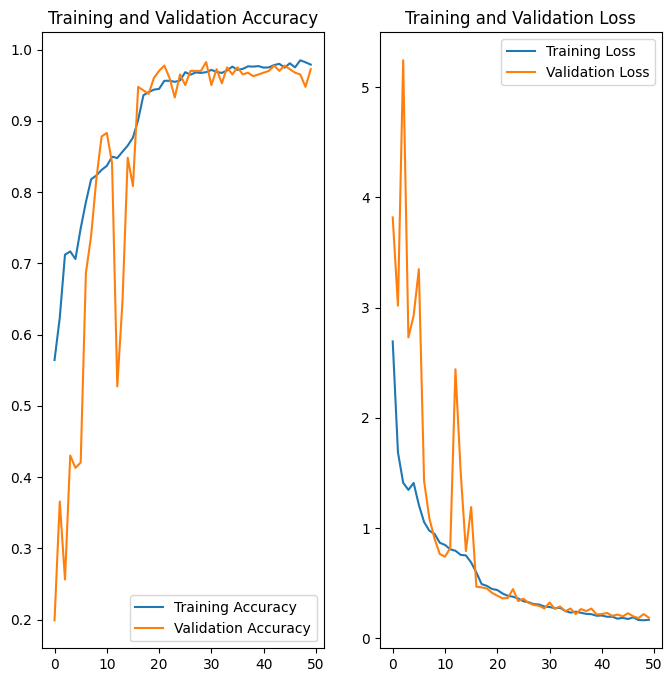

In [46]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine the actual number of epochs based on training history
EPOCHS = len(acc)  # Use the length of the accuracy list

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()